In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv('bestsellers with categories.csv')

In [61]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Book Ratings
Ranking by rating can give a high number but some should be more credible if they have more reviews. 

A weighted rating, that takes into consideration the number of reviews, will be a better option for this ranking.

$\text{WeightedRating(WR)}=(\frac{v}{v+m}⋅R)+(\frac{m}{v+m}⋅C)$
 
where 

$R$ = average rating for the book

$v$ = number of reviews for the book

$m$ = minimum reviews required to be listed in the best seller list

$C$ = the mean rating in the dataset

In [62]:
m = min(df['Reviews'])
C = df['User Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v / (v+m) * R) + (m / (v+m) * C)

In [63]:
df['Weighted Rating'] = df.apply(weighted_rating, axis=1)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699826
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699841
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699859
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799127


In [64]:
df = df.sort_values('Weighted Rating', ascending = False)

## Who are the Top 10 Authors Who Sold the Most Books?

Text(0.5, 1.0, 'Top 10 Authors Who Sold the Most Books')

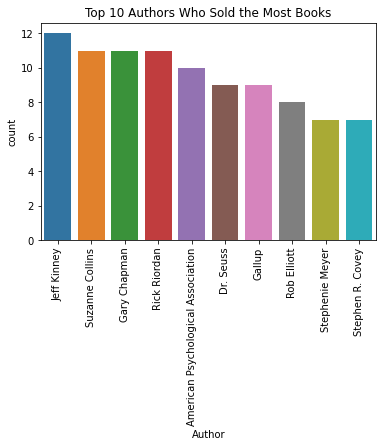

In [65]:
sns.countplot(df['Author'], order = df.Author.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Authors Who Sold the Most Books')

## Who are the Top 10 Bestselling Authors?

In [78]:
top_10_authors = df.groupby('Author', as_index=False)['Weighted Rating'].mean().sort_values('Weighted Rating', ascending=False).head(10)
top_10_authors

,Author,Weighted Rating
211,Sarah Young,4.899469
83,Eric Carle,4.899468
26,Bill Martin Jr.,4.899275
123,Jill Twiss,4.899126
173,Nathan W. Pyle,4.898894
82,Emily Winfield Martin,4.898826
41,Chip Gaines,4.898681
215,Sherri Duskey Rinker,4.898527
58,Dav Pilkey,4.898439
146,Lin-Manuel Miranda,4.898235


Text(0.5, 1.0, 'Top 10 Bestselling Authors')

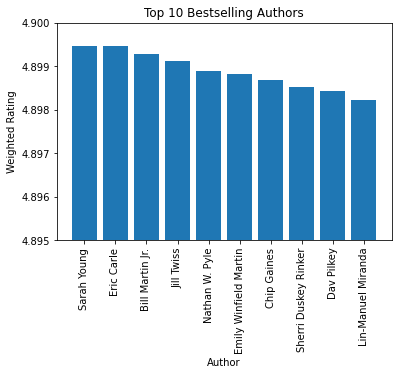

In [134]:

plt.bar(top_10_authors['Author'] , top_10_authors['Weighted Rating'])
plt.xticks(rotation = 90)
plt.ylim(4.895,4.9)
plt.xlabel('Author')
plt.ylabel('Weighted Rating')
plt.title('Top 10 Bestselling Authors')

## What are the Top 10 Bestselling Books?

In [77]:
top_10_books = df.groupby('Name', as_index=False)['Weighted Rating'].mean().sort_values('Weighted Rating', ascending=False).head(10)
top_10_books

,Name,Weighted Rating
178,"Oh, the Places You'll Go!",4.899524
116,Harry Potter and the Chamber of Secrets: The I...,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,4.899469
310,The Very Hungry Caterpillar,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,4.899177
151,Last Week Tonight with John Oliver Presents A ...,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),4.898897
208,Strange Planet (Strange Planet Series),4.898894


Text(0.5, 1.0, 'Top 10 Bestselling Books')

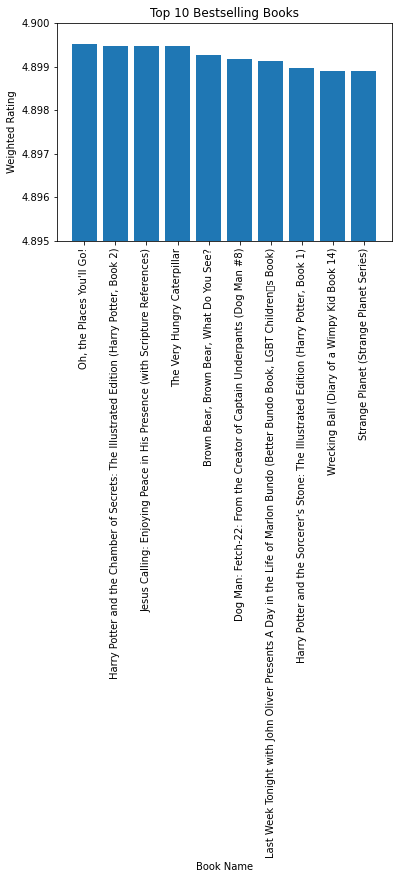

In [95]:
plt.bar(top_10_books['Name'] , top_10_books['Weighted Rating'])
plt.xticks(rotation = 90)
plt.ylim(4.895,4.9)
plt.xlabel('Book Name')
plt.ylabel('Weighted Rating')
plt.title('Top 10 Bestselling Books')

## What are the Top 10 Most Expensive Bestselling Books?

In [76]:
top_10_exp = df.groupby('Name', as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)
top_10_exp

,Name,Price
56,Diagnostic and Statistical Manual of Mental Di...,105.0
307,The Twilight Saga Collection,82.0
112,Hamilton: The Revolution,54.0
228,The Book of Basketball: The NBA According to T...,53.0
115,Harry Potter Paperback Box Set (Books 1-7),52.0
191,Publication Manual of the American Psychologic...,46.0
333,Watchmen,42.0
281,The Official SAT Study Guide,40.0
220,The Alchemist,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",36.0


Text(0.5, 1.0, 'Top 10 Most Expensive Books')

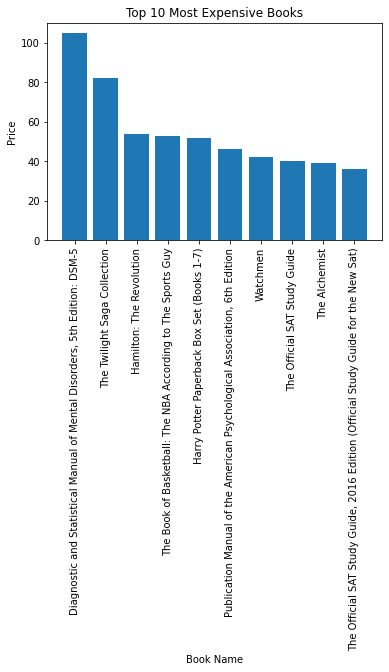

In [94]:
plt.bar(top_10_exp['Name'] , top_10_exp['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Book Name')
plt.ylabel('Price')
plt.title('Top 10 Most Expensive Books')

## What are the portions of Non-Fiction vs. Fiction Books?

Text(0.5, 1.0, 'Non-Fiction vs. Fiction')

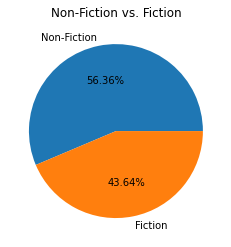

In [112]:
portions = df['Genre'].value_counts()
portions/=sum(portions)
plt.pie(portions, labels = ['Non-Fiction' , 'Fiction'], autopct = '%1.2f%%')
plt.title('Non-Fiction vs. Fiction')

## Who are the Top 10 Authors with the Most Reviews and their Weighted Ratings?

Text(0, 0.5, '# of Reviews')

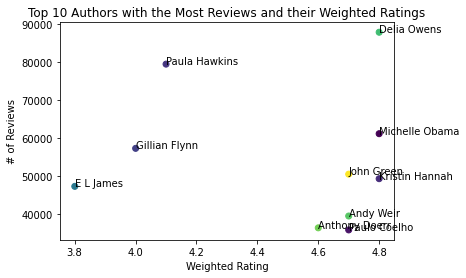

In [129]:
fig, ax = plt.subplots()
top_10_revrat = df.groupby(['Author','Name', 'Genre'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)
colors = np.random.randn(10)
ax.scatter(top_10_revrat['Weighted Rating'], top_10_revrat['Reviews'],  c = colors)
n = top_10_revrat['Author']
for i, txt in enumerate(n):
    ax.annotate(txt, (top_10_revrat['Weighted Rating'].iloc[i], top_10_revrat['Reviews'].iloc[i]))
ax.set_title('Top 10 Authors with the Most Reviews and their Weighted Ratings')
ax.set_xlabel('Weighted Rating')
ax.set_ylabel('# of Reviews')